1.6128197349624713
[[ 3.27665210e-02  5.15997712e-02  1.21728483e-04 -9.96859629e-02
  -5.90648714e-02  3.76322165e-02  1.65063911e-01 -7.49344707e-02
   8.78427815e-02  1.68083777e-02]
 [ 1.80139339e-01  2.80112858e-03 -3.32477268e-02 -3.98476469e-02
  -7.72324363e-02 -5.71750421e-02 -6.70536688e-02  4.27612784e-02
   5.77133294e-02  5.87156894e-02]
 [-7.87453102e-02  1.13420389e-01 -3.37671688e-03 -4.29452896e-02
  -1.90055374e-03  8.37651347e-02 -8.04079428e-02  7.96545531e-02
   3.83850240e-02 -4.67516933e-03]
 [-6.84514458e-02  4.22351601e-02 -5.42799294e-02 -3.77208807e-02
  -5.44745701e-02  1.62078915e-01  5.60757204e-02  1.11230404e-02
  -1.69802790e-02  7.99228105e-02]
 [-1.97296988e-02  6.62265083e-02  5.70496978e-02 -1.71331597e-01
  -5.98740206e-02  3.29887013e-02  6.41247746e-02 -3.44170705e-02
   4.41662654e-02  1.77739132e-01]
 [ 1.20392164e-01  5.07773227e-02  7.07212530e-02  1.12698189e-02
   1.34708991e-02 -1.93519834e-02 -1.01917893e-01 -1.48049200e-01
  -1.06770346e

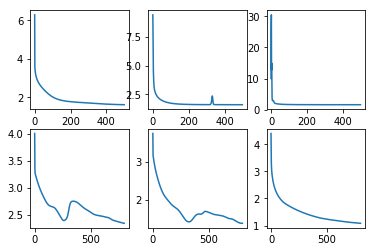

In [8]:
from back_propogation.backprop \
    import Node as node, backward as backward, forward as forward, reset as reset
import back_propogation.analytic_function as af
import numpy as np
import matplotlib.pyplot as pyplot
l = []
def f(v):
    return [v[i] for i in range(500)]
    
X = np.load('assignment8_X.npy')
Y = np.load('assignment8_Y.npy')
t = 25
ite = 500
a = 0.009

# print(X.shape)
# print(Y.shape)

# structure of NN1

x = node('x')
w1 = node('w1')
w2 = node('w2')
h1 = node('h1')
h2 = node('h2')

x.toNode(h1)
w1.toNode(h1)
h1.toNode(h2)
w2.toNode(h2)

h1.analyze(af.funcMatVec(), [w1, x], True)
h2.analyze(af.funcMatVec(), [w2, h1], True)

pl = 1
for m in [10, 25, 50]:
    w1val = 0.1 * np.random.randn(m, 10)
    w2val = 0.1 * np.random.randn(10, m)
    l = []
    for index in range(ite):
        w1_gradient = []
        w2_gradient = []
        loss = 0
        for i in range(len(X)):
            xval = X[i]
            yval = Y[i]
            forward([x, w1, w2], [xval, w1val, w2val])
            backward(h2)
            w1_gradient.append(sum([np.multiply((h2.value[j] - yval[j]), w1.der[j]) for j in range(len(yval))]))
            w2_gradient.append(sum([np.multiply((h2.value[j] - yval[j]), w2.der[j]) for j in range(len(yval))]))
            local = np.sum([(h2.value[j] - yval[j]) ** 2 for j in range(len(yval))])
            loss += local
            reset(h2)
        l.append(loss/t)
        w1_g = sum(w1_gradient) / t * 2
        w2_g = sum(w2_gradient) / t * 2
        w1val -= a * w1_g
        w2val -= a * w2_g
    ax = np.arange(ite)
    pyplot.subplot(2,3,pl)
    pl+=1
    pyplot.plot(ax, l)
    print(loss / t)
    print(np.dot(w2val, w1val))
    reset(h2)

ite = 800
a = 0.055
#structure of NN2
x = node('x')
w1 = node('w1')
w2 = node('w2')
h1 = node('h1')
h2 = node('h2')
v1 = node('v1')

x.toNode(h1)
w1.toNode(h1)
h1.toNode(v1)
v1.toNode(h2)
w2.toNode(h2)

h1.analyze(af.funcMatVec(), [w1, x], True)
v1.analyze(af.funcSig(), [h1], True)
h2.analyze(af.funcMatVec(), [w2, v1], True)

for m in [10, 25, 50]:
    w1val = 0.1 * np.random.randn(m, 10)
    w2val = 0.1 * np.random.randn(10, m)
    l = []
    for index in range(ite):
        w1_gradient = []
        w2_gradient = []
        loss = 0
        for i in range(len(X)):
            xval = X[i]
            yval = Y[i]
            forward([x, w1, w2], [xval, w1val, w2val])
            backward(h2)
            w1_gradient.append(sum([np.multiply((h2.value[j] - yval[j]), w1.der[j]) for j in range(len(yval))]))
            w2_gradient.append(sum([np.multiply((h2.value[j] - yval[j]), w2.der[j]) for j in range(len(yval))]))
            loss += np.sum([(h2.value[j] - yval[j]) ** 2 for j in range(len(yval))])
            reset(h2)
        l.append(loss/t)
        w1_g = sum(w1_gradient) / t * 2
        w2_g = sum(w2_gradient) / t * 2
        w1val -= a * w1_g
        w2val -= a * w2_g
    ax = np.arange(ite)
    pyplot.subplot(2,3,pl)
    pyplot.plot(ax, l)
    pl+=1
    print(loss / t)
    print(np.dot(w2val, w1val))
    reset(h2)
